In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_2017 = pd.read_csv('/Users/rakesh/Documents/DSC167/hmda_2017_nationwide_all-records_labels.csv', 
                      dtype = {'msamd': str, 'state_code': str, 'county_code': str, 'census_tract_number': str,
                              'denial_reason_1':str, 'denial_reason_2': str, 'denial_reason_3': str})

/Users/rakesh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Rakesh Senthilvelan and Shin Ehara

## Introduction

When it comes to lending, there have always been disparities between different groups of people in terms of acceptance and accessibility. There have been numerous ways in which discrimination has been employed throughout the years, with lending being one of the largest areas. We wanted to examine the disparities that exist between groups based on race, gender, and sexual orientation among others. The reason we came to these disparities was based on reading previous works done through research institutions such as Vanderbilt University (https://business.vanderbilt.edu/news/2020/07/20/racial-disparities-in-lending-markets/), Proceedings of the National Academy of Sciences of the United States of America (https://www.pnas.org/content/116/19/9293), and the National Community Reinvestment Coalition (https://ncrc.org/wp-content/uploads/2009/07/ncrc%20nosheild%20june%2009.pdf). We wanted to see the specificities of these disparities in terms of how they are carried out in the real world, whether certain other inequities have a domino effect towards lending data, and what potential solutions there may be to this disparity. To look into this, we took in data from the HMDA, short for the Home Mortgage Disclosure Act, which will show data on loan applications for houses. We will be able to see many factors such as race, gender of applicant and co-applicant, income bracket, reason for loan denial, and more. Throughout the research project, we will dive into different areas of discrimination or bias seen in lending data provided by the HMDA in 2017, finding the reasons behind them, and looking into potential areas that will need to be addressed by lenders in the future for a more equitbale experience for everybody.

## Justification for the Data in Approaching the Problem at Hand

The data provided by HMDA dataset provides a lot of insight into the inequities that are present in loans. The data in question is the most recently available set to us, which is 2017. In the preliminary exploratory data analysis, we looked into three factors: application status based on race, application status based on the sex of the applicant and co-applicant, and the reasons for denial based on race. What we found in this step was interesting. In terms of application status based on race, we noticed significant discrepancies for loan approvals by race, with White and Asian applicants seeing approval ratings around 58%, Hawaiian Native and Pacfic Islander applicants around 51%, and Native American and Black applicants around 44-45%. This shows a significant gap in loan approval ratings between racial groups and this is something we look to further examine in our paper. For the sex of applicant and co-applicant, we wanted to see if there were any significant discrepancies. While we cannot assume that an applicant and a co-applicant would be in a relationship, we thought it would be important to see the approval and rejection ratings for these combinations. What we noted was that generally, applications where a male is the applicant and a female is a co-applicant have the highest approval rating at around 61%, with female applicant and male co-applicant following at 58.8%, male applicant and co-applicant at 58%, and female appplicant and co-applicant at 55.1%. We noticed somewhat significant differences between these rates and we look to further explore this area. Finally, we looked at reasons for rejection by race. While the rankings of denial reasons were roughly similar amongst all groups, we noticed some differences in the percentages that these reasons made up for each group. We believe this will be an interesting area to further examine in the final paper. Based on our EDA, we found numerous statistical differences in the loan data that would potentially point to inequities in this system of America. As a result, this dataset is a strong source to examine the problem at hand and examine the specificities of this inequity in our society.

## The Context of the Inequity

The financial inequities faced by minority populations is not a new concept. According to a report done in 1996 by the Federal Reserve Bank of Boston, it was found that there existed a discrepancy where, when it came to mortgage applications, "minority applicants with the same economic and property characteristics as white applicants would experience a denial rate of 17 percent rather than the actual white denial rate of 11 percent". To further understand this discepancy, we must look into concepts of equality. From an egalitarian perspective, this shows a significant discrepancy, with a look into the comparative nature of the above statement showing that there is not equal access to the opportunity of receiving a mortgage. From a Rawlisian perspective, this discrepancy does not entitle everybody from the same financial background to the same liberties and opportunities in purchasing a house. This shows that when looking at this research from multiple perspectives of equality, they universally conclude that there is inequality in this situation. However, this was in 1996, that brings forward the question. Has this inequity gotten better since then? In a study from Professor Mark Cohen of Vanderbilt University in July of 2020, it was found that "African Americans pay twice the markup whites did". This indicates that inequality still exists in the lending industry against minority groups when it comes to loan rejection rates and markups on properties. 

## Hypothesis

Based on our preliminary exploratory data analysis and the historical context of this issue, we have the alternative hypothesis that when it comes to mortgage lending that there are significant discrepancies between different racial groups when it comes to loan approval in similar income and loan amount brackets. Our null hypothesis is that there is no significant discrepancy between loan appovals by race within similar income and loan amount brackets. 

## Regarding Application Status Based on Race

In [3]:
df_race_action = df_2017[['action_taken_name','action_taken','applicant_race_name_1','applicant_race_1']]

In [4]:
white_action = df_race_action[df_race_action['applicant_race_1'] == 5]

The key for actions is as follows: 1 represents loan originated, 2 represents application approved but not accepted, 3 represents application denied by financial institution, 4 represents application withdrawn by applicant, 5 represents file closed for incompleteness, 6 represents loan purchased by institution, 7 represents Preapproval request denied by financial institution, and 8 represents Preapproval request approved but not accepted (optional reporting).

These are the loan actions taken for white applicants.

In [5]:
white_action['action_taken'].value_counts(normalize=True) * 100

1    58.993101
3    13.936836
4    12.444372
6     6.344793
5     4.211396
2     3.129952
7     0.666690
8     0.272859
Name: action_taken, dtype: float64

In [6]:
black_action = df_race_action[df_race_action['applicant_race_1'] == 3]

These are the loan actions taken for Black applicants.

In [7]:
black_action['action_taken'].value_counts(normalize=True) * 100

1    45.334724
3    24.862152
4    14.197212
5     5.989391
6     3.897338
2     3.360810
7     2.195089
8     0.163283
Name: action_taken, dtype: float64

In [8]:
na_action = df_race_action[df_race_action['applicant_race_1'] == 1]

These are the loan actions taken for Native American applicants.

In [9]:
na_action['action_taken'].value_counts(normalize=True) * 100

1    44.667299
3    25.251852
4    14.837391
5     6.781764
6     3.629959
2     3.164580
7     1.488302
8     0.178852
Name: action_taken, dtype: float64

These are the loan actions taken for Asian applicants.

In [10]:
asian_action = df_race_action[df_race_action['applicant_race_1'] == 2]
asian_action['action_taken'].value_counts(normalize=True) * 100

1    58.277401
4    13.691896
3    12.536359
6     6.712867
5     4.321741
2     3.233973
7     0.732019
8     0.493744
Name: action_taken, dtype: float64

These are the loan actions taken for Native Hawaiian or other Pacific Islander applicants.

In [11]:
pa_action = df_race_action[df_race_action['applicant_race_1'] == 4]
pa_action['action_taken'].value_counts(normalize=True) * 100

1    51.913531
3    18.328900
4    14.479814
5     5.507649
6     4.997713
2     3.015569
7     1.597574
8     0.159249
Name: action_taken, dtype: float64

When looking at the rates of rejection for different racial groups, this is what comes up. This shows a significant discrepancy between rejection rates based on race, with the rates for Black and Native American applicants being almost double that of White and Asian applicants. 

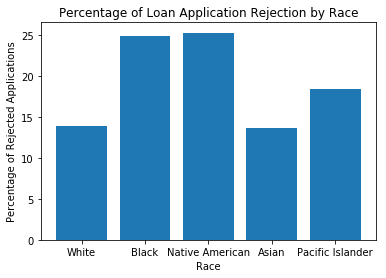

In [12]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [13.936836, 24.862152, 25.251852, 13.691896, 18.328900]

plt.bar(race, reject)
plt.title('Percentage of Loan Application Rejection by Race')
plt.xlabel('Race')
plt.ylabel('Percentage of Rejected Applications')
plt.show()

## Regarding Application Status Based on Sex of Applicant and Co-Applicant

In [13]:
df_action_gender = df_2017[['applicant_sex_name','applicant_sex','co_applicant_sex_name','co_applicant_sex','action_taken_name','action_taken']]

The key for actions is as follows: 1 represents loan originated, 2 represents application approved but not accepted, 3 represents application denied by financial institution, 4 represents application withdrawn by applicant, 5 represents file closed for incompleteness, 6 represents loan purchased by institution, 7 represents Preapproval request denied by financial institution, and 8 represents Preapproval request approved but not accepted (optional reporting).

These are the loan actions taken when the main applicant is male and the co-applicant is female.

In [14]:
m_f = df_action_gender[(df_action_gender['applicant_sex']==1) & (df_action_gender['co_applicant_sex'] == 2)]
m_f['action_taken'].value_counts(normalize=True) * 100

1    61.082976
4    12.395166
3    11.823354
6     6.582495
5     4.188526
2     3.055464
7     0.595727
8     0.276292
Name: action_taken, dtype: float64

These are the loan actions taken when the main applicant is female and the co-applicant is male.

In [15]:
f_m = df_action_gender[(df_action_gender['applicant_sex']==2) & (df_action_gender['co_applicant_sex'] == 1)]
f_m['action_taken'].value_counts(normalize=True) * 100

1    58.772253
3    14.716190
4    12.203630
6     5.869638
5     4.144491
2     3.055725
7     0.913898
8     0.324175
Name: action_taken, dtype: float64

These are the loan actions taken when the main applicant is male and the co-applicant is male.

In [16]:
m_m = df_action_gender[(df_action_gender['applicant_sex']==1) & (df_action_gender['co_applicant_sex'] == 1)]
m_m['action_taken'].value_counts(normalize=True) * 100

1    58.003196
3    15.100793
4    11.925589
6     7.169793
5     3.974963
2     2.903945
7     0.735274
8     0.186447
Name: action_taken, dtype: float64

These are the loan actions taken when the main applicant is female and the co-applicant is female.

In [17]:
f_f = df_action_gender[(df_action_gender['applicant_sex']==2) & (df_action_gender['co_applicant_sex'] == 2)]
f_f['action_taken'].value_counts(normalize=True) * 100

1    55.149407
3    17.625607
4    12.118420
6     6.512960
5     4.525981
2     2.909834
7     0.953566
8     0.204226
Name: action_taken, dtype: float64

## Looking Into Reasons for Denial By Race

In [18]:
df_denials = df_2017[['action_taken_name','action_taken','applicant_race_name_1','applicant_race_1',
                     'denial_reason_name_1', 'denial_reason_1', 'denial_reason_name_2',
                      'denial_reason_2', 'denial_reason_name_3', 'denial_reason_3',]]

The key for denial reasons are as follows: 1 represents Debt-to-income ratio, 2 represents Employment history, 3 represents Credit history, 4 represents Collateral, 5 represents Insufficient cash (downpayment, closing costs), 6 represents Unverifiable information, 7 represents Credit application incomplete, 8 represents Mortgage insurance denied, and 9 represents Other.

This is the distribution of denial reasons for Native Americans applicants. 

In [19]:
na_denial = df_denials[df_denials['applicant_race_1'] == 1]
na_counts = na_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(na_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,3,8328,0.369542
1,1,5798,0.257277
2,9,2381,0.105653
3,4,2147,0.095270
4,7,1740,0.077210
5,5,936,0.041534
6,6,777,0.034478
7,2,384,0.017039
8,8,45,0.001997


This is the distribution of denial reasons for Asian applicants. 

In [20]:
as_denial = df_denials[df_denials['applicant_race_1'] == 2]
as_counts = as_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(as_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,1,26872,0.318019
1,3,15163,0.179448
2,4,9839,0.116441
3,9,9304,0.110109
4,7,9289,0.109932
5,6,6302,0.074582
6,5,5325,0.063019
7,2,2253,0.026663
8,8,151,0.001787


This is the distribution of denial reasons for Black applicants. 

In [21]:
bl_denial = df_denials[df_denials['applicant_race_1'] == 3]
bl_counts = bl_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(bl_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,3,86281,0.373391
1,1,58779,0.254373
2,9,25282,0.109411
3,4,21887,0.094719
4,7,15457,0.066892
5,5,12601,0.054532
6,6,6923,0.029960
7,2,3472,0.015025
8,8,392,0.001696


This is the distribution of denial reasons for Native Hawaiian or other Pacific Islander applicants. 

In [22]:
pa_denial = df_denials[df_denials['applicant_race_1'] == 4]
pa_counts = pa_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(pa_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,3,3395,0.313221
1,1,3065,0.282775
2,9,1233,0.113756
3,4,1057,0.097518
4,7,887,0.081834
5,5,576,0.053141
6,6,411,0.037919
7,2,202,0.018636
8,8,13,0.001199


This is the distribution of denial reasons for White applicants. 

In [23]:
wh_denial = df_denials[df_denials['applicant_race_1'] == 5]
wh_counts = wh_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(wh_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,3,307209,0.277187
1,1,285249,0.257373
2,4,161464,0.145685
3,9,115495,0.104208
4,7,112956,0.101917
5,5,51627,0.046582
6,6,48620,0.043869
7,2,23504,0.021207
8,8,2185,0.001971


## The Effects of Income on Loan Approval

When we first looked into the exploratory data analysis on application statuses based on raced, we noticed significant disparities between different racial groups in terms of the percentages that were accepted for loans. We first wanted to see if there were other disparities that may have impacted these statistics. The first was to look into income data and see if there are major disparities here that may lead to certain racial groups seeing higher rates of rejection. 

In [24]:
df_2017.groupby(['applicant_race_1'])['applicant_income_000s'].median()

applicant_race_1
1     66.0
2    107.0
3     64.0
4     80.0
5     78.0
6     84.0
7     77.0
Name: applicant_income_000s, dtype: float64

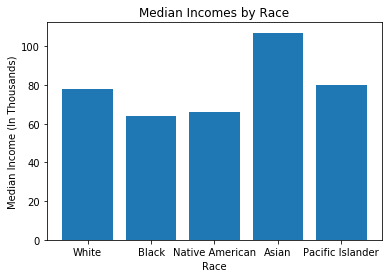

In [25]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [78.0, 64.0, 66.0, 107.0, 80.0]

plt.bar(race, reject)
plt.title('Median Incomes by Race')
plt.xlabel('Race')
plt.ylabel('Median Income (In Thousands)')
plt.show()

From the above statistics, we can see that the median incomes of each racial group roughly coincides with the acceptance rates on loans. The one discrepancy we see is with Native Hawaiian or other Pacific Islander applicants, which in the case of median show a slightly higher median income compared to White applicants depsite having a 7% lower acceptance rate. We believe that this may be due to a limited sample of this group of applicants in this dataset compared to White applicants, but it is possible that this could point to a significant inequity in this system. The main takeaway was that median incomes show relations to the rates of application acceptance, with White and Asian applicants showing higher rates of loan approvals along with higher median incomes while Black and Native American applicants showed lower median incomes and lower rates of loan approvals. 

In [26]:
df_2017.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

## A Look Into Median Loan Amounts Taken by Each Group

To look further into this disparity, we wanted to look into the median loan amounts that are seen by these different racial groups. From here, we hope to compare the amounts relative to income and see if there is a significant disparity between different racial groups receiving different results despite having similar financial conditions and loan requests. 

In [27]:
df_2017.groupby(['applicant_race_1'])['loan_amount_000s'].median()

applicant_race_1
1    150.0
2    293.0
3    157.0
4    229.0
5    180.0
6    194.0
7    190.0
Name: loan_amount_000s, dtype: float64

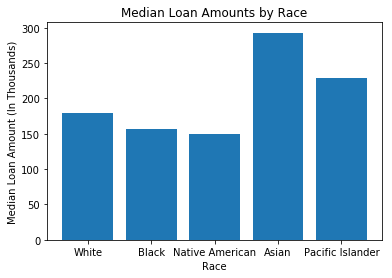

In [28]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [180.0, 157.0, 150.0, 293.0, 229.0]

plt.bar(race, reject)
plt.title('Median Loan Amounts by Race')
plt.xlabel('Race')
plt.ylabel('Median Loan Amount (In Thousands)')
plt.show()

Through this, we can see that the difference between White, Black, and Native American loan amounts is not as significant as the difference in rejection rates or even income. 

## The Relationship Between Amount Loaned and Income

To further dive into any disparities in this area, we wanted to look into the relationship between the amount loaned and the income of the people applying for them. To do this, we created a column that took the ratio of loan amount by income, grouped by each racial group, and took the median. We believe that if all these values are similar that there is a sign of inequity in the lending data based on racial groups. 

In [29]:
df_2017['loan_to_income'] = df_2017['loan_amount_000s']/df_2017['applicant_income_000s']

In [30]:
df_2017.groupby(['applicant_race_1'])['loan_to_income'].median()      

applicant_race_1
1    2.333333
2    2.923913
3    2.500000
4    2.890625
5    2.368421
6    2.398148
7    2.702703
Name: loan_to_income, dtype: float64

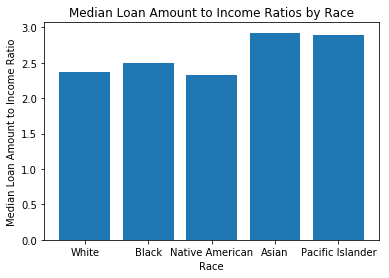

In [31]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [2.368421, 2.500000, 2.333333, 2.923913, 2.890625]

plt.bar(race, reject)
plt.title('Median Loan Amount to Income Ratios by Race')
plt.xlabel('Race')
plt.ylabel('Median Loan Amount to Income Ratio')
plt.show()

When looking into the factors that developed these ratios, we wanted to rule out other factors that may skew the ratios. We know that some racial groups are more represented than other in this dataset, so we wanted to make sure that the number of loans may skew the averages of these ratios. In order to accomodate this, we used median as our measure to get a value that was more robust to significant outliers and numbers of loans. In terms of comparing loan amounts to incomes, our analysis in the past two charts indicate that the two scale with each other. This would mean that there are not many cases that would result in significant effects in our analysis except for in the case of Asian and Pacific Islander applicants. 

Sources:

https://business.vanderbilt.edu/news/2020/07/20/racial-disparities-in-lending-markets/

https://www.pnas.org/content/116/19/9293

https://ncrc.org/wp-content/uploads/2009/07/ncrc%20nosheild%20june%2009.pdf

https://www.bostonfed.org/publications/research-department-working-paper/1992/mortgage-lending-in-boston-interpreting-hmda-data.aspx

https://law.yale.edu/sites/default/files/documents/pdf/Intellectual_Life/ltw-Scanlon.pdf